# Lab#2 <br>
### Noam Yan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Problem 1

1A.  X = 3.9, Y = 6.6

In [228]:
X = 3.9
Y = 4.2
days = np.arange(1,6,1)

xrange = np.linspace(0,10,11)

In [230]:
pmf = stats.poisson.pmf(k=xrange,mu=X,loc=0)
conv_pmf = pmf

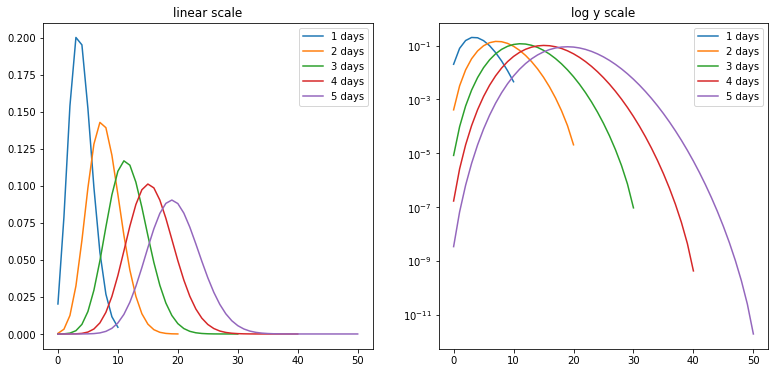

In [117]:
plt.rcParams["figure.figsize"] = (13,6)
fig, ax = plt.subplots(1, 2)
for i in days:
    conv_pmf = pmf
    if i-1 != 0:
        for j in range(i-1):
            conv_pmf = np.convolve(conv_pmf,pmf)
    ax[0].plot(np.linspace(0,10*i,10*i+1),conv_pmf,label = '%s days' %i)
    ax[1].plot(np.linspace(0,10*i,10*i+1),conv_pmf,label = '%s days' %i)    
ax[0].set_title('linear scale')
ax[1].set_title('log y scale')
ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')

1B.     <br>


1C.

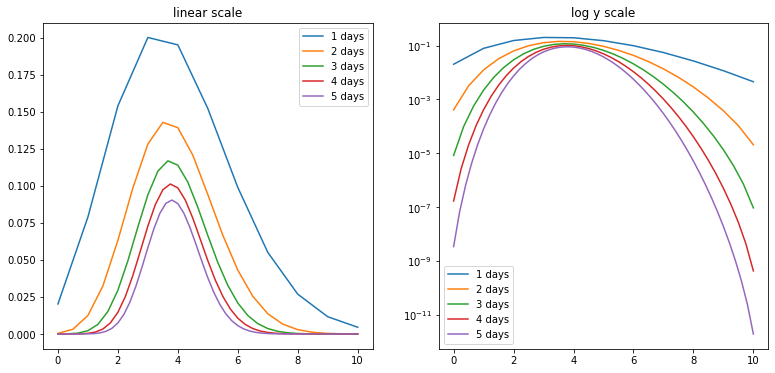

In [122]:
plt.rcParams["figure.figsize"] = (13,6)
fig, ax = plt.subplots(1, 2)
for i in days:
    conv_pmf = pmf
    if i-1 != 0:
        for j in range(i-1):
            conv_pmf = np.convolve(conv_pmf,pmf)
    ax[0].plot(np.linspace(0,10,10*i+1),conv_pmf,label = '%s days' %i)
    ax[1].plot(np.linspace(0,10,10*i+1),conv_pmf,label = '%s days' %i)    
ax[0].set_title('linear scale')
ax[1].set_title('log y scale')
ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')

1D. N=4

In [152]:
N = 4
Y*N

16.8

In [153]:
conv_pmf = pmf
for i in range(N-1):
    conv_pmf = np.convolve(conv_pmf,pmf)

prob = 1-stats.poisson.cdf(k=Y*N,mu=X,loc=0)
prob

8.085161854465284e-07

In [155]:
sigV = stats.norm.isf(q=prob,loc=0,scale=1)
print(sigV)

4.796200740579053


The observation point is at 4.79sigma away from mean.

## Problem 2

In [266]:
delta = 1e-2
xrange = np.linspace(0,10,int(10/delta)+1)
interval = [1,5,10,100,200,500]

pdf = stats.rayleigh.pdf(x=xrange, loc = 3, scale=1)
pmf = pdf*delta


D:\Softwares\Anacoda\envs\tf2\lib\site-packages\matplotlib\ticker.py:1106: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = round(x / b ** exponent)


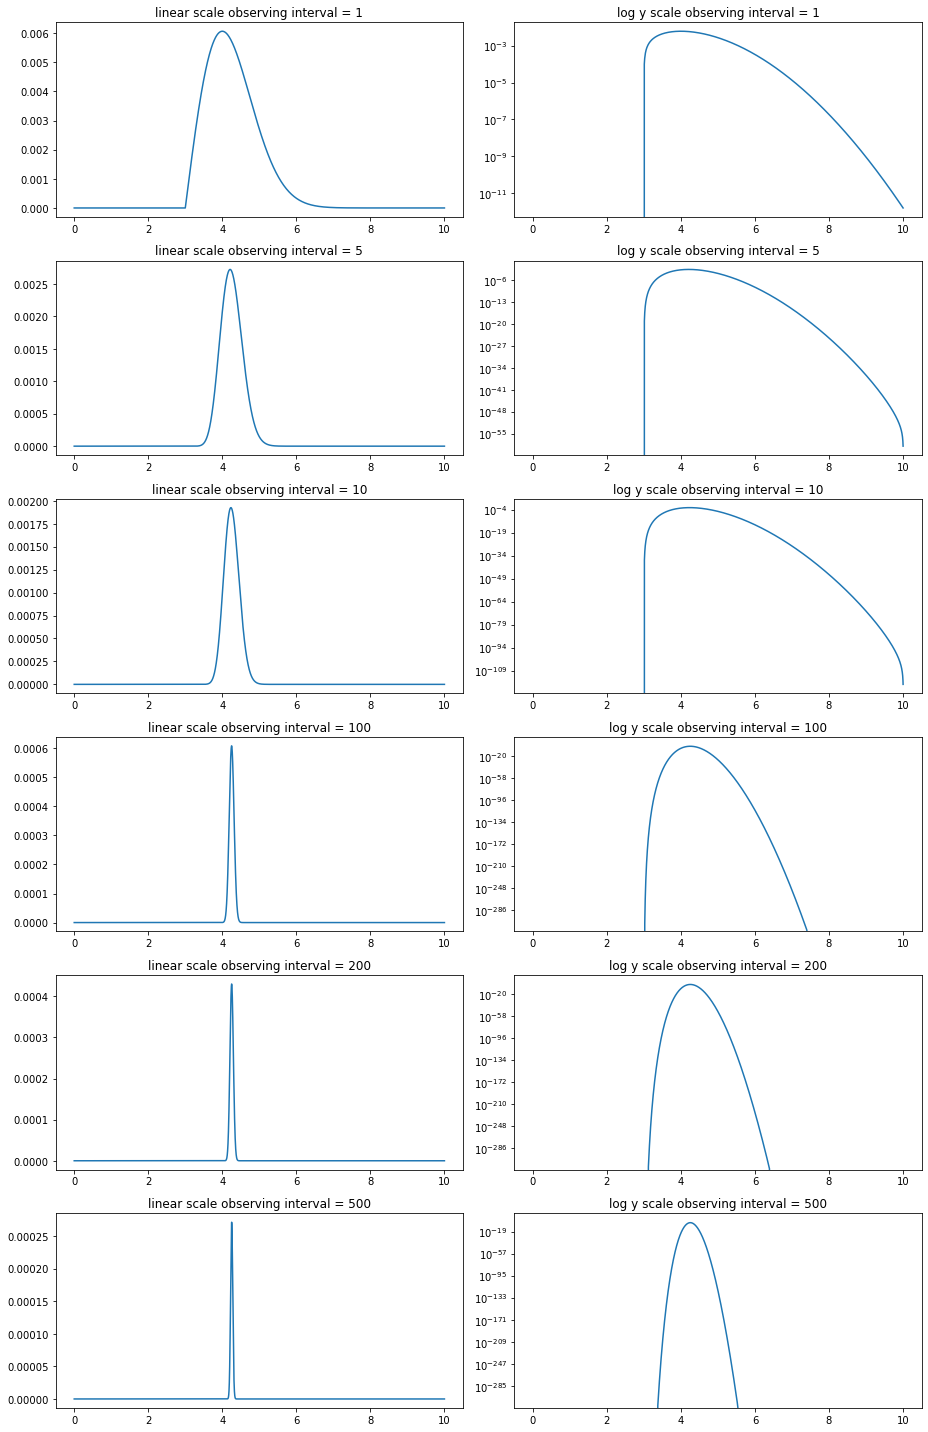

In [269]:
plt.rcParams["figure.figsize"] = (13,20)
fig, ax = plt.subplots(len(interval), 2)
for i,val in enumerate(interval):
    conv_pmf = pmf
    if val-1 != 0:
        for j in range(val-1):
            conv_pmf = np.convolve(conv_pmf,pmf)
    conv_pdf = pmf/delta
    ax[i,0].plot(np.append(np.arange(0,10,delta/val),[10]),conv_pmf)
    ax[i,1].plot(np.append(np.arange(0,10,delta/val),[10]),conv_pmf)
    ax[i,0].set_title('linear scale observing interval = %s'%val)
    ax[i,1].set_yscale('log')
    ax[i,1].set_title('log y scale observing interval = %s'%val)
fig.tight_layout()

2A&B.

As the interval increases, the shape with both linear axes and log y-axis get narrower. It is clear that the shape is approaching to Gaussian distribution. As far as I can test now, after 500 summation, the shape is almost the same as Gaussian. 